# **Análise de sentimento das notícias do mercado de ações em português**



#### **Introdução**

---

O que as pessoas pensam sobre a sua empresa ou sobre a empresa que você trabalha? Já imaginou escanear a reação de um montante grande de pessoas e, com isso, acelerar uma tomada de decisão, como uma automação, que tem uma influência direta sobre o negócio? Conseguimos responder essas e outras perguntas utilizando 'Análise de sentimentos'.


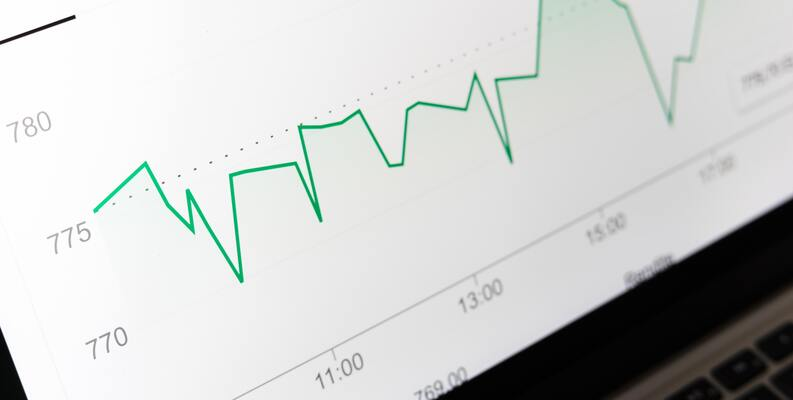

A análise de sentimentos é uma mineração contextual do texto que identifica e extrai informações subjetivas no material de origem e ajuda a empresa a entender o sentimento social de sua marca, produto ou serviço enquanto monitora.

**Por exemplo: 'hoje estou feliz.'**

Quem for ler esta frase perceberá claramente que trata-se de uma frase de alegria, entretanto como fazer o computador entender que esta frase é uma frase de felicidade? 

A resposta é simples: utilizando o aprendizado de máquina!






#### **Sobre os dados**

---


O 'Financial Phrase Bank' é um conjunto de dados desenvolvido originalmente para o artigo [Good Debt or Bad Debt: Detecting Semantic Orientations in Economic Texts](https://www.researchgate.net/publication/251231107_Good_Debt_or_Bad_Debt_Detecting_Semantic_Orientations_in_Economic_Texts), disponibilizado por pesquisadores da Aalto University e do Indian Institute of Management. O conjunto de dados permite uma referência útil para ajustar modelos de linguagem em tarefas de análise de sentimento.

Esse estudo estará utilizando dados traduzidos pelo [Mateus Picanco](https://www.kaggle.com/mateuspicanco) - Cientista de Dados na Microsoft, na qual disponibilizou o dataset através da plataforma 'Kaggle' para trabalharmos.

O conjunto de dados originalmente contém notícias financeiras anotadas manualmente em inglês e consiste em três colunas:

- **y:** o rótulo anotado para o sentimento do texto da notícia (neutro, positivo, negativo)
- **text:** o texto original de cada registo
- **text_pt:** a versão traduzida manualmente do registro original

#### **Objetivo**

---


Com base nas informações dispostas nesse conjunto de dados, irei trabalhar no tratamento, limpeza e transformação do texto com o objetivo de treinar um modelo de machine learning capaz de classificar cada amostra do dataset como uma das seguintes labels: positiva, negativa ou neutra.

<img src="https://media.giphy.com/media/dQpUkK59l5Imxsh8jN/giphy.gif" alt="win" width="600"/>

#### **Primeiras impressões do nosso conjunto de dados**

---

In [1]:
# Importando os dados

import pandas as pd
df = pd.read_csv('financial_phrase_bank_pt_br.csv')

import warnings
warnings.filterwarnings('ignore')

# Importando bibliotecas de visualização
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline

# Álgebra Linear
import numpy as np 

# Expressões regulares (Regex)
import re 

In [2]:
#Visualização das 10 primeiras linhas do dataset

df.head(10)

,y,text,text_pt
0,neutral,Technopolis plans to develop in stages an area...,A Technopolis planeja desenvolver em etapas um...
1,negative,The international electronic industry company ...,"A Elcoteq, empresa internacional da indústria ..."
2,positive,With the new production plant the company woul...,Com a nova planta de produção a empresa aument...
3,positive,According to the company 's updated strategy f...,De acordo com a estratégia atualizada da empre...
4,positive,FINANCING OF ASPOCOMP 'S GROWTH Aspocomp is ag...,FINANCIAMENTO DO CRESCIMENTO DA ASPOCOMP A Asp...
5,positive,"For the last quarter of 2010 , Componenta 's n...","No último trimestre de 2010, as vendas líquida..."
6,positive,"In the third quarter of 2010 , net sales incre...","No terceiro trimestre de 2010, as vendas líqui..."
7,positive,Operating profit rose to EUR 13.1 mn from EUR ...,"O lucro operacional aumentou para EUR 13,1 mil..."
8,positive,"Operating profit totalled EUR 21.1 mn , up fro...","O lucro operacional totalizou EUR 21,1 milhões..."
9,positive,TeliaSonera TLSN said the offer is in line wit...,A TeliaSonera TLSN disse que a oferta está em ...


Acima temos as 10 primeiras linhas do nosso conjunto de dados.

Para facilitar, vamos renomear a coluna 'y' para 'TARGET:

In [3]:
# Renomeando a coluna 'y'

df = df.rename(columns={"y": "TARGET"})

In [4]:
#Verificando as informações do dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4845 entries, 0 to 4844
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   TARGET   4845 non-null   object
 1   text     4845 non-null   object
 2   text_pt  4845 non-null   object
dtypes: object(3)
memory usage: 113.7+ KB


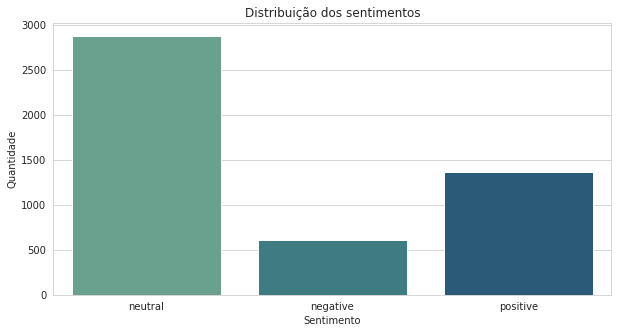

In [5]:
# Distribuição dos sentimentos

sns.set_style('whitegrid')
plt.figure(figsize=(10, 5))
sns.countplot(x='TARGET', data=df, palette='crest');
plt.title("Distribuição dos sentimentos");
plt.xlabel("Sentimento");
plt.ylabel("Quantidade");

Até aqui podemos concluir que:
- Nosso conjunto de dados possui 4.845 registros 
- Não temos nenhuma linha com valores missing
- 59,40% dos sentimentos são 'neutros'
- 28,13% dos sentimentos são 'positivos'
- 12,47% dos sentimentos são 'negativos'

#### **Nuvem de palavras**

---


Por curiosidade vamos gerar uma nuvem de palavras!

A nuvem de palavras dependendo do nosso conjunto de dados pode nos dar bons 'insights'. Conseguimos ver logo de cara se os sentimentos nos comentários são bons ou não. 

Como mais de 50% dos nossos comentários aqui representam "neutro" acredito que não iremos ter 'insights' tão relevantes, mas vamos tirar a prova:

In [6]:
# Importando biblioteca da Nuvem de palavras

from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords

In [7]:
# Juntando frases do nosso conjunto de dados
nuvem = " ".join(s for s in df['text_pt']) 

# Salvando palavras que podem ser consideradas irrelevantes na nuvem de palavras na variável 'stopwords'
nltk.download('stopwords')
stopwords = stopwords.words('portuguese') 

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


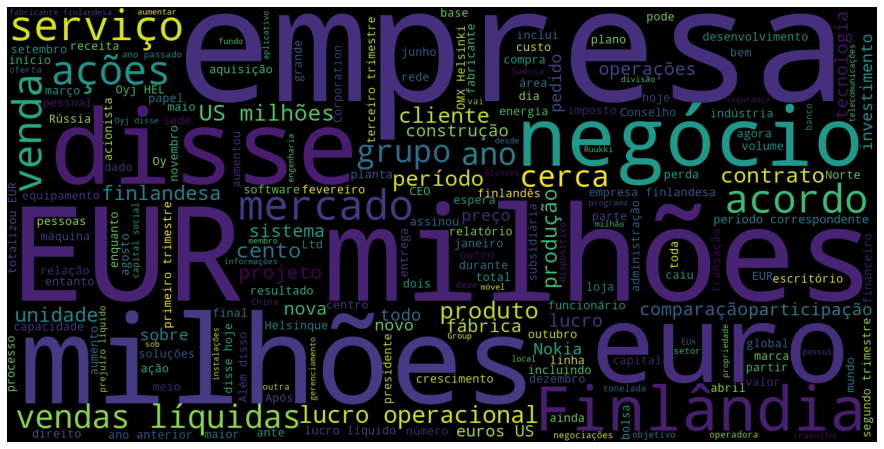

In [8]:
# Plot da nuvem de palavras 

wordcloud = WordCloud(stopwords=stopwords,
                      background_color="black",
                      width=1600, height=800).generate(nuvem)

fig, ax = plt.subplots(figsize=(25,8))
ax.imshow(wordcloud, interpolation='bilinear')
ax.set_axis_off()
 
plt.imshow(wordcloud);

Como já previsto não conseguimos ter um insight hiper relavante com a nuvem de palavras, temos de fazer um certo "esforço" para encontrar algo de relevante nas palavras mais comuns. Aqui vale o destaque para assuntos de "lucro operacional", "vendas líquidas" e comentários de empresas da "Finlândia".

<img src="https://media.giphy.com/media/jWexOOlYe241y/giphy.gif" alt="win" width="300"/>

#### **Limpeza e Tratamento**

---


Feito nossa nuvem de palavras, agora vamos ao tratamento e limpeza de texto!

Podemos começar olhando para o nosso primeiro registro do conjunto de dados:

In [9]:
# Olhando o primeiro registro 

df.text_pt[0]

'A Technopolis planeja desenvolver em etapas uma área não inferior a 100 mil metros quadrados para hospedar empresas que atuam em tecnologias de informática e telecomunicações, afirma o comunicado.'

Nossas frases estão com pontuações, números e caracteres especiais, para melhor desempenho do nosso modelo de machine learning vamos realizar uma limpeza e aplicar em nosso conjunto de dados:

In [10]:
# Função 'limpeza' que remove números, pontuações e caracteres especiais

def limpeza(text):
	x = re.compile(r'(<.*?>)|([^a-zA-z]|\[|\]|\_)')
	return re.sub(x, ' ', text)
 
# Aplicando limpeza no conjunto de dados
df.text_pt = df.text_pt.apply(limpeza)

# Visualizando nosso primeiro registro limpo
df.text_pt[0]

'A Technopolis planeja desenvolver em etapas uma  rea n o inferior a     mil metros quadrados para hospedar empresas que atuam em tecnologias de inform tica e telecomunica  es  afirma o comunicado '

Agora que conseguimos limpar as pontuações, números e caracteres especiais, vamos deixar nossos textos em "lower_case" (Minúsculo):

In [11]:
# Função 'lower' que deixa todas as letras minúsculas

def lower_case(text):
	return text.lower()
 
# Aplicando lower_case no conjunto de dados
df.text_pt = df.text_pt.apply(lower_case)

# Visualizando nosso registro 1
df.text_pt[0] 

'a technopolis planeja desenvolver em etapas uma  rea n o inferior a     mil metros quadrados para hospedar empresas que atuam em tecnologias de inform tica e telecomunica  es  afirma o comunicado '

A partir daqui vamos entrar na próxima etapa do nosso processamento de linguagem natural, iremos remover as stopwords.

Precisamos somente das palavras que tem algum significado, para isso vamos usar o pacote NLTK. Dentro deste pacote existem as "stopwords" que vão nos auxiliar a remover palavras que podem ser consideradas irrelevantes.

In [12]:
# Pacotes de manipulação de texto

from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer 

In [13]:
# download das stopwords

import nltk
nltk.download('stopwords')
nltk.download('punkt')

# Criando função para remover stopwords
def remove_stopwords(text):
	stop_words = set(stopwords.words('portuguese'))
	words = word_tokenize(text)
	return [x for x in words if x not in stop_words]

# Aplicando remove_stopwords no conjunto de dados
df.text_pt = df.text_pt.apply(remove_stopwords)

# Visualizando nosso registro 1
df.text_pt[0] 

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


['technopolis',
 'planeja',
 'desenvolver',
 'etapas',
 'rea',
 'n',
 'inferior',
 'mil',
 'metros',
 'quadrados',
 'hospedar',
 'empresas',
 'atuam',
 'tecnologias',
 'inform',
 'tica',
 'telecomunica',
 'es',
 'afirma',
 'comunicado']

Para finalizarmos nosso tratamento e limpeza, iremos utilizar um algoritmo de lematização chamado 'SNOWBALL STEMMER'.

Em palavras simples, vamos reduzir uma palavra à sua palavra base ou radical de tal forma que as palavras de tipo semelhante fiquem sob um radical comum (radicalizar):

In [14]:
# Utilizando o SnowballStemmer

def stemmer_txt(text):
	x = SnowballStemmer('portuguese')
	return " ".join([x.stem(w) for w in text])
 
# Aplicando stemmer_txt no conjunto de dados
df.text_pt = df.text_pt.apply(stemmer_txt)

# Visualizando nosso registro 1
df.text_pt[0] 

'technopol planej desenvolv etap rea n inferior mil metr quadr hosped empres atu tecnolog inform tic telecomun es afirm comunic'

<img src="https://media.giphy.com/media/3DnDRfZe2ubQc/giphy.gif" alt="win" width="600"/>



#### **Machine Learning**

---


Agora que já tiramos as primeiras impressões do dataset e já realizamos a limpeza e tratamento do texto, vamos implementar um modelo de Machine Learning capaz de **classificar** os sentimentos de cada amostra do dataset como: positivo, negativo ou neutro. 

Importante dizer que até este ponto não foi escolhido ou pré definido nenhum algoritmo em específico. Para auxiliar nossa escolha irei utilizar a lib 'lazypredict' mais a frente.

*Normalização dos dados*

---

Para conseguirmos criar nosso modelo de machine learning precisamos converter nosso texto em dados numéricos. Para isso vamos utilizar o método 'CountVectorizer'. Ele é usado para transformar um determinado texto em um vetor com base na frequência (contagem) de cada palavra que ocorre em todo o texto:

In [15]:
# Importando CountVectorizer

from sklearn.feature_extraction.text import CountVectorizer

Agora que já importamos o 'CountVectorizer', vamos definir nossas variáveis de entrada, alvo e aplicar nossa normalização no conjunto de dados:

In [16]:
# Definindo variáveis e aplicando CountVectorizer na variável 'X'

x = np.array(df.iloc[:,2].values) # Frases em pt
y = np.array(df.TARGET.values) # Alvo
cv = CountVectorizer(max_features = 1000)
X = cv.fit_transform(df.text_pt).toarray() # Vetores

*Divisão treino e teste*

---

Feito nossos vetores, precisamos dividir nossos dados em dois conjuntos:
- Dados que serão apresentados ao algoritmo para treinar um modelo (Treino)
- Dados que serão apresentados ao modelo após a sua criação para simular previsões reais (Teste):

In [17]:
# Importando método para divisão treino e teste do nosso conjunto de dados

from sklearn.model_selection import train_test_split

In [18]:
# Inicializando método e pegando 30% do conjunto de dados para teste

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=0)

*Lazy Predict’s*

---

Esse estudo irá utilizar a lib 'Lazy Predict' para auxiliar na escolha de um algoritmo de classificação. Essa biblioteca ajuda a construir muitos modelos básicos sem muito código e ajuda a entender quais modelos funcionam melhor sem nenhum ajuste de parâmetro.

Dito isto, mãos a obra:

In [ ]:
# Instalando biblioteca
!pip install lazypredict

# Importando LazyClassifier (Algoritmos de classificação)
from lazypredict.Supervised import LazyClassifier

In [23]:
# Chamando método 'LazyClassifier' e passando dados de treino e teste

clf = LazyClassifier(predictions=True)
models, predictions = clf.fit(X_train, X_test, y_train, y_test)
models

100%|██████████| 29/29 [02:18<00:00,  4.79s/it]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
ExtraTreesClassifier,0.76,0.67,None,0.75,4.55
BaggingClassifier,0.74,0.66,None,0.74,7.68
LinearDiscriminantAnalysis,0.74,0.66,None,0.73,2.12
RandomForestClassifier,0.77,0.66,None,0.76,3.16
RidgeClassifierCV,0.74,0.66,None,0.74,1.90
RidgeClassifier,0.74,0.66,None,0.73,0.43
LGBMClassifier,0.76,0.65,None,0.75,3.55
Perceptron,0.69,0.63,None,0.70,0.73
DecisionTreeClassifier,0.70,0.62,None,0.70,1.41


Graças a biblioteca 'lazypredict' conseguimos uma tabela com os principais algoritmos de classificação rankeados do que melhor se adaptou ao nosso conjunto de dados ao pior sem ajuda de hiperparâmetros.

Desta forma, vou utilizar o algoritmo **'ExtraTreesClassifier'** para este estudo. Ele apresentou de primeiro momento uma acurácia de 76% e o f1-score de 75%.

*Otimização de hiperparâmetros - Random search*

---

A ideia de usar a lib do 'lazypredict' era escolher um algoritmo inicial pra depois otimizar os parâmetros do mesmo. Nosso algoritmo escolhido foi o 'ExtraTreesClassifier', então bora encontrar a melhor combinação de parâmetros.

Primeiro vamos começar importando a lib do nosso algoritmo e algumas métricas de avaliação:

In [ ]:
# Importando nosso algoritmo
from sklearn.ensemble import ExtraTreesClassifier

# Importando métricas de avaliação
!pip install scikit-optimize
from skopt import dummy_minimize
from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix, accuracy_score

Para tunar nosso modelo vamos utilizar o método **'Random search'** (busca aleatória). O intuito aqui é ela nos dar a melhor combinação entre os seguintes parâmetros:
- **n_estimators:** O número de árvores na floresta
- **max_features:** O número de recursos a serem considerados ao procurar a melhor divisão
- **min_samples_leaf:** O número mínimo de amostras necessárias para estar em um nó
- **min_samples_split:** O número mínimo de amostras necessárias para dividir um nó
- **criterion:** A função para medir a qualidade de uma divisão. Os critérios suportados são "gini" para a impureza de Gini e "entropy" para o ganho de informação.

In [62]:
# Criando a função que vai realizar a busca aleatória e encontrar os melhores parâmetros para nosso modelo
def treinar_modelo(params):
    n_estimators = params[0]
    max_features = params[1]
    min_samples_leaf = params[2]
    min_samples_split = params[3]
    criterion = params[4]
    
    etc_model = ExtraTreesClassifier(n_estimators=n_estimators, max_features=max_features, min_samples_leaf=min_samples_leaf, 
                                     min_samples_split=min_samples_split, criterion=criterion, random_state=0, n_jobs=-1,)
    etc_model.fit(X_train, y_train)
    
    pip = etc_model.predict_proba(X_test)[:]
    
    return -roc_auc_score(y_test, pip,multi_class='ovo');


# Parâmetros
space = [(10, 20, 50, 100, 200, 500, 1000, 1200, 1500, 1800, 1900, 2000, 2100, 3000), # n_estimators
         ('auto', 'sqrt', 'log2', 2, 5, 8, 13, 21, 34, None), # max_features
         (1, 2, 5, 8, 13, 21, 34, 55, 89, 144, 233, 377), # min_samples_leaf
         (2, 5, 8, 13, 21, 34, 55, 89, 144, 233, 377), # min_samples_split
         ('gini', 'entropy')] # criterion


# Chamando a função 'treinar_modelo' e atribuindo na variável 'resultado'
resultado = dummy_minimize(treinar_modelo, space, random_state=0, verbose=1); 

Iteration No: 1 started. Evaluating function at random point.
Iteration No: 1 ended. Evaluation done at random point.
Time taken: 3.6760
Function value obtained: -0.6413
Current minimum: -0.6413
Iteration No: 2 started. Evaluating function at random point.
Iteration No: 2 ended. Evaluation done at random point.
Time taken: 10.8519
Function value obtained: -0.8558
Current minimum: -0.8558
Iteration No: 3 started. Evaluating function at random point.
Iteration No: 3 ended. Evaluation done at random point.
Time taken: 10.5102
Function value obtained: -0.7887
Current minimum: -0.8558
Iteration No: 4 started. Evaluating function at random point.
Iteration No: 4 ended. Evaluation done at random point.
Time taken: 3.2026
Function value obtained: -0.5858
Current minimum: -0.8558
Iteration No: 5 started. Evaluating function at random point.
Iteration No: 5 ended. Evaluation done at random point.
Time taken: 11.2206
Function value obtained: -0.7501
Current minimum: -0.8558
Iteration No: 6 starte

Finalizada a busca aleatória, vamos descobrir qual o melhor grupo de parâmetros que foi encontrado:

In [63]:
'''
Descobrindo resultados da busca aleatória

Lembrando que nossos parâmetros estão na seguinte ordem:
--> n_estimators = params[0]
--> max_features = params[1]
--> min_samples_leaf = params[2]
--> min_samples_split = params[3]
--> criterion = params[4]
'''

# Acessando resultados da busca aleatória
# Resultados ---> [1900, 21, 1, 8, 'gini']
resultado.x

[1900, 21, 1, 8, 'gini']

*Modelo ExtraTreesClassifier*

---

Agora que achamos nossos parâmetros ideais vamos realizar um novo treinamento com eles:

In [20]:
# Inicializando modelo na variável 'model'
model = ExtraTreesClassifier(n_estimators=1900, max_features=21, min_samples_leaf=1, 
                                     min_samples_split=8, criterion='gini', random_state=0, n_jobs=-1,)

# Treinando modelo
model.fit(X_train, y_train)

# Passando nossas predições pra variável 'pred'
pred = model.predict(X_test)

In [21]:
# Salvando modelo
import pickle

with open("modelo_ExtraTreesClassifier.pkl", "wb") as arquivo:
	pickle.dump(model, arquivo)

*Avaliação do modelo*

---

Agora que temos nosso modelo treinado com os hiperparâmetros vamos avaliar os resultados.

Umas das métricas de avaliação é a "Acurácia", ela diz o quanto o modelo acertou de acordo com as previsões possíveis:

In [22]:
# Acurácia

acc = accuracy_score(y_test,pred)
print("Acurácia do modelo = %2.f%%" % (acc *100.00))

Acurácia do modelo = 77%


Dentre as bibliotecas que importamos existe o "relatório de classificação", nele somos apresentados a mais 3 métricas, são elas:

- *Recall/Sensibilidade*: Medida que nos mostra o quão bom o modelo é para prever/detectar positivos
- *Precisão*: Medida que nos ajuda a responder a seguinte pergunta: Dos classificados como positivos, quantos são realmente positivos?
- *f1-score:* Nos mostra o balanço entre a precisão e o recall de nosso modelo, quanto mais próximo de 1 melhor

In [23]:
# Criando relatório de classificação 

report_df = pd.DataFrame(classification_report(y_test,pred, output_dict=True)). T
report_df = report_df.drop(columns=['support'])

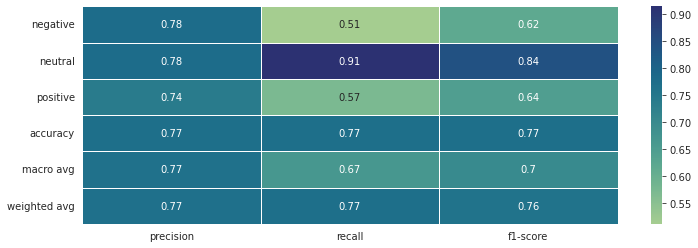

In [24]:
# Plotagem do relatório de classificação 

plt.subplots(figsize=(12,4))
sns.heatmap(report_df, cmap='crest', linecolor='white',linewidths=0.5,annot=True);

Por último e não menos importante, também temos a "matriz de confusão". Ela é uma tabela que mostra as frequências de classificação para cada classe do nosso modelo:

In [25]:
# Criando a matriz de confusão 

cnf_report_df = report_df.index[:-3]
cnf_matrix = confusion_matrix(y_test,pred)
cnf_matrix = pd.DataFrame(cnf_matrix, index = cnf_report_df.values, columns = cnf_report_df.values)
cnf_matrix = cnf_matrix/cnf_matrix.sum(axis=1)[:, np.newaxis] # Normalização em linha (recall)

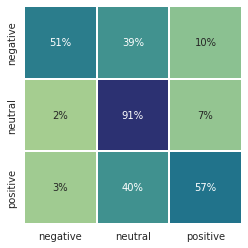

In [26]:
# Plotagem da matriz de confusão 

sns.heatmap(cnf_matrix, cmap='crest', linecolor='white', linewidths=0.3, annot=True, fmt='.0%', cbar=False, square=True);

Conclusões após a utilização dos hiperparâmetros:
- Nossa acurácia saiu de 76% para 77%
- Nosso relatório de classificação mostra que o f1-score (média ponderada) saiu de 75% para 76%
- Matriz de confunsão mostra que nosso modelo possui extrema facilidade de encontrar sentimentos neutros e muita dificuldade em classificar positivos e negativos.

Confesso que esperava mais otimizando os hiperparâmetros, mas conseguimos uma  pequena melhora em nosso modelo comparado aos resultados do 'lazypredict'.

Tendo em vista que mais da metade do nosso conjunto de dados representam sentimentos neutros, não mexemos em outros parâmetros do algoritmo e também não testamos outros dos muitos algoritmos de classificação (como RandomForestClassifier) penso que tivemos um modelo aceitável para estudos. Em cenários do mundo real precisamos de mais inputs (dataset balanceado) para deixar o modelo adequado para as classificações.

<img src="https://media.giphy.com/media/L2xcBudpN3nXTfV8ya/giphy.gif" alt="win" width="500"/>

Finalizado nosso modelo de machine learning, vamos criar uma função que vai nos auxiliar a classificar sentimentos de **novas** frases:

In [27]:
# Criando função model

def model(text):

  # Limpeza e tratamento de texto
  f1 = limpeza(text)
  f2 = lower_case(f1)
  f3 = remove_stopwords(f2)
  f4 = stemmer_txt(f3)

  # Vocabulário do countvectorizer
  word_dict = cv.vocabulary_

  ll = []
  for i in word_dict:
    ll.append(f4.count(i[0]))

  # Carregando nosso modelo já treinado e retornando a previsão 
  with open("modelo_ExtraTreesClassifier.pkl", "rb") as arquivo:
	  modelo = pickle.load(arquivo)
  return modelo.predict(np.array(ll).reshape(1,1000))

In [57]:
# Criando variável 'frase' (Aqui pode ser qualquer frase)
frase = '''Com satisfação o lucro líquido de todas as 359 companhias da bolsa brasileira aumentou 83%'''

# Chamando nossa função e classificando sentimento da frase nova
model(frase)

array(['neutral'], dtype=object)

#### **Conclusão**

Através deste estudo, quis trazer ao conhecimento como implementar análise de sentimentos de comentários do mercado de ações, a fim de deixar o entendimento mais transparente e direto. Algo que também está no escopo deste estudo foi a criação de uma nuvem de palavras e a criação de um modelo de machine learning, passando por processos de transformação de dados, limpeza, avaliação e por fim a submissão do nosso modelo em dados de teste (Frases Novas).

Obviamente, como todos os estudos, este não é uma exceção e poderá ser sempre refinado, ainda assim, este sempre estará aberto para novas ideias, feedbacks e ferramentas a serem implementadas.

O principal resultado que obtivemos aqui foi a criação do nosso modelo de machine learning. Se pensarmos só em 'estudos' conseguimos criar um bom modelo com 77% de assertividade, mas para o mundo real eu não recomendaria ir para o ambiente de produção. A quantidade de sentimentos 'neutro' no conjunto de dados é muito grande (Mais de 55%), isso acaba afetando de forma direta nosso modelo de machine learning, por este motivo seria recomendável um estudo mais aprofundado com outros algoritmos, métodos ou até com dataset's mais balanceados para classificar melhor sentimentos 'positivos' e 'negativos'.